In [1]:
import numpy as np

import qcodes as qc
import silq
%matplotlib notebook

In [1]:
from silq.tools.general_tools import SettingsClass
settings = SettingsClass()

In [5]:
settings.name

1

# Perform loop

In [2]:
def print_active():
    pass
#     print(qc.active_loop().get_data_set())

In [3]:
dummy_parameter = qc.ManualParameter(name='dummy', initial_value=42)

In [32]:
loop = qc.Loop(dummy_parameter[0:5:1]).loop(
    dummy_parameter[0:5:1], delay=0.1).each(
        dummy_parameter,
        qc.BreakIf(dummy_parameter > 1))

In [33]:
data = loop.run()

DataSet:
   mode     = DataMode.LOCAL
   location = 'data/2017-04-20/#003_{name}_10-39-42'
   <Type>   | <array_id>  | <array.name> | <array.shape>
   Setpoint | dummy_set   | dummy        | (5,)
   Setpoint | dummy_set_0 | dummy        | (5, 5)
   Measured | dummy       | dummy        | (5, 5)
started at 2017-04-20 10:39:44


In [34]:
data.dummy

DataArray[5,5]: dummy
array([[  0.,   1.,   2.,  nan,  nan],
       [  0.,   1.,   2.,  nan,  nan],
       [  0.,   1.,   2.,  nan,  nan],
       [  0.,   1.,   2.,  nan,  nan],
       [  0.,   1.,   2.,  nan,  nan]])

In [8]:
qc.MatPlot(dataset.dummy)

<IPython.core.display.Javascript object>

# Data saving

In [9]:
from silq.tools import data_tools
from qcodes.data.data_array import DataArray

In [10]:
name = 'traces'
base_folder = r'2017-04-19\#001_{name}_12-36-10'
subfolder = None

location_string = '{base_folder}/#{{counter}}_{name}'
location = qc.data.location.FormatLocation(
    fmt=location_string.format(base_folder=base_folder, name=name,
                               subfolder=subfolder))
formatter = None

In [11]:
arr = np.random.randint(0, 10, (5,5))
xlabel = 'time'
xvals = np.linspace(0,1,arr.shape[0])
ylabel = 'trace'

## Add dataset through acquisition parameter

In [12]:
from silq.parameters.acquisition_parameters import AcquisitionParameter, T1Parameter

In [13]:
class Layout:
    def sample_rate(self):
        return 100e3

In [14]:
acquisition_parameter = T1Parameter()
acquisition_parameter.layout = Layout()
acquisition_parameter.sample_rate

100000.0

In [15]:
traces_dict={'traces1': np.random.rand(5, 100)}
acquisition_parameter.store_traces(base_folder=base_folder,
                                   traces_dict=traces_dict)
acquisition_parameter.dataset

DataSet:
   mode     = DataMode.LOCAL
   location = '2017-04-19\\#001_traces_12-36-10/#018_traces'
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | time       | time         | (5, 100)
   Measured | traces1    | traces1      | (5, 100)
   Setpoint | trace_num  | trace_num    | (5,)

<IPython.core.display.Javascript object>


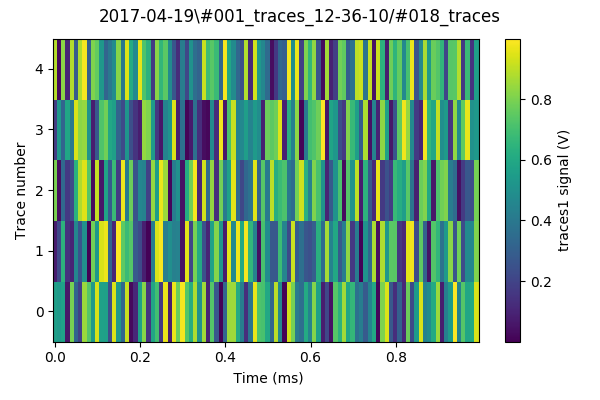

In [24]:
qc.MatPlot(acquisition_parameter.dataset.traces1)

## Iteratively update dataset

In [17]:
from qcodes.data.data_set import new_data, DataMode, DataSet

In [18]:
np.arange(0, 1000, 10).shape

(100,)

In [19]:
dataset = data_tools.create_data_set(base_folder=base_folder, name=name)
dataset

DataSet:
   mode     = DataMode.LOCAL
   location = '2017-04-19\\#001_traces_12-36-10/#019_traces'
   <Type> | <array_id> | <array.name> | <array.shape>

In [20]:
data_array_set = DataArray(name=xlabel,
                   shape=(len(xvals),),
                   preset_data=xvals,
                   is_setpoint=True)

In [21]:
dataset.add_array(data_array_set)

In [22]:
dataset

DataSet:
   mode     = DataMode.LOCAL
   location = '2017-04-19\\#001_traces_12-36-10/#019_traces'
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | None       | time         | (5,)

In [23]:
shape,
                    xlabel='index0', xvals=None,
                    ylabel='set_vals', yvals=None,
    # Default values for x and y axes
    if xvals is None:
        xvals = np.arange(shape[0])
    if yvals is None:
        yvals = np.arange(shape[-1])

    data_array_set = DataArray(name=xlabel,
                               shape=(shape[0],),
                               preset_data=xvals,
                               is_setpoint=True)
    index0 = DataArray(name=ylabel, shape=shape,
                       preset_data=np.full(shape,
                                           yvals,
                                           dtype=np.int))
    data_array_values = DataArray(name='data_vals',
                                  shape=shape,
                                  set_arrays=(
                                      data_array_set, index0))


IndentationError: unexpected indent (<ipython-input-23-85cff60e21f4>, line 2)

In [ ]:
dataset.add_array(arr)

## Load existing dataset

In [ ]:
dataset_load = qc.load_data(r'2017-04-19\\#001_traces_12-36-10/#003_traces')
dataset_load.location

In [ ]:
qc.MatPlot(dataset_load.data_vals.transpose())